In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

### Загрузка и знакомство с датасетом

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

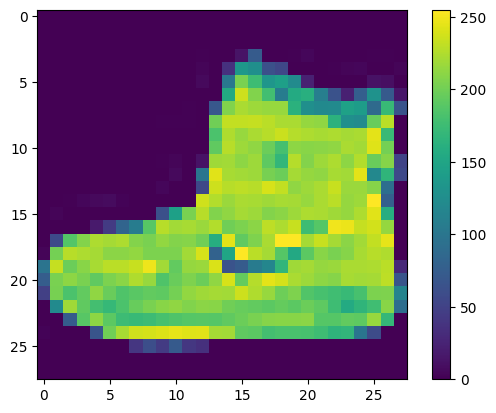

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Нормализация

train_images = train_images / 255.0

test_images = test_images / 255.0

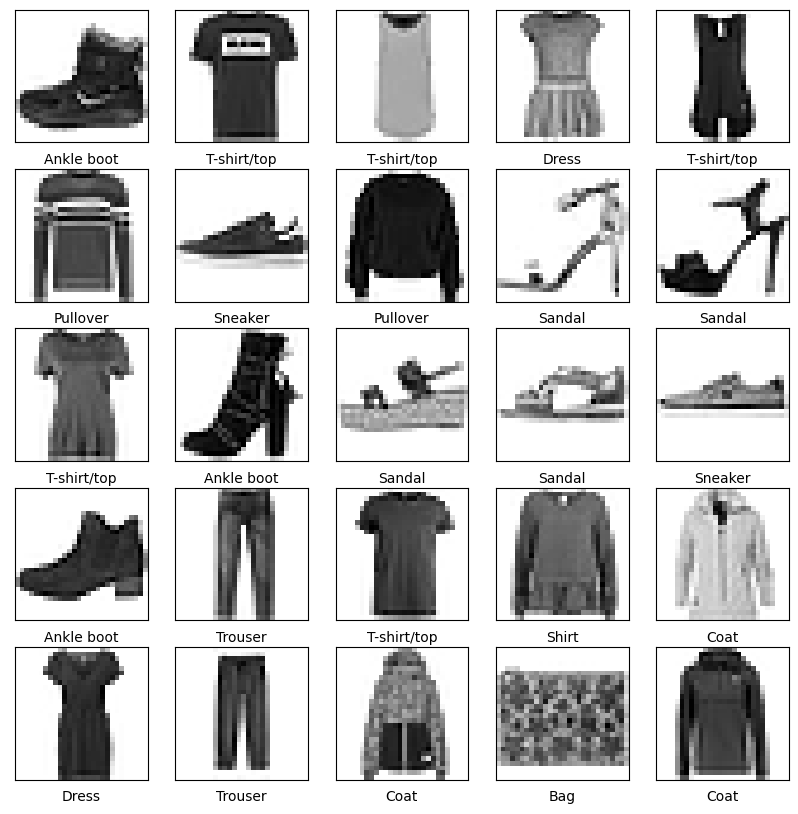

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Создание и тренировка модели

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
def report(genuine, predicted):
    to_nums = []
    
    for el in predicted:
        to_nums.append(np.argmax(el))
        
    print('REPORT\n\n' + classification_report(genuine, to_nums))
    print('CONFUSION MATRIX\n')
        
    print(pd.crosstab(genuine, to_nums))

**Модель из урока**

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 2s - loss: 0.4986 - accuracy: 0.8235 - 2s/epoch - 878us/step
Epoch 2/3
1875/1875 - 1s - loss: 0.3746 - accuracy: 0.8650 - 1s/epoch - 697us/step
Epoch 3/3
1875/1875 - 1s - loss: 0.3362 - accuracy: 0.8762 - 1s/epoch - 677us/step


In [48]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [49]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 558us/step


In [50]:
predictions[7]

array([9.6052521e-05, 9.9398513e-08, 1.2022979e-03, 3.0063540e-05,
       3.6482077e-02, 2.0231198e-06, 9.6213979e-01, 5.0868209e-08,
       4.7513593e-05, 1.4174532e-07], dtype=float32)

In [51]:
np.argmax(predictions[7])

6

In [52]:
test_labels[7]

6

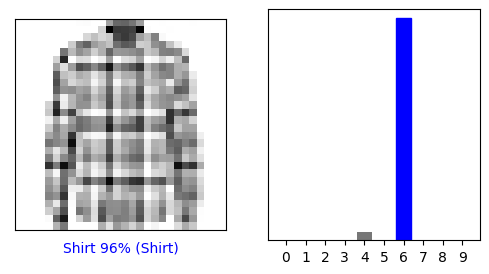

In [53]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

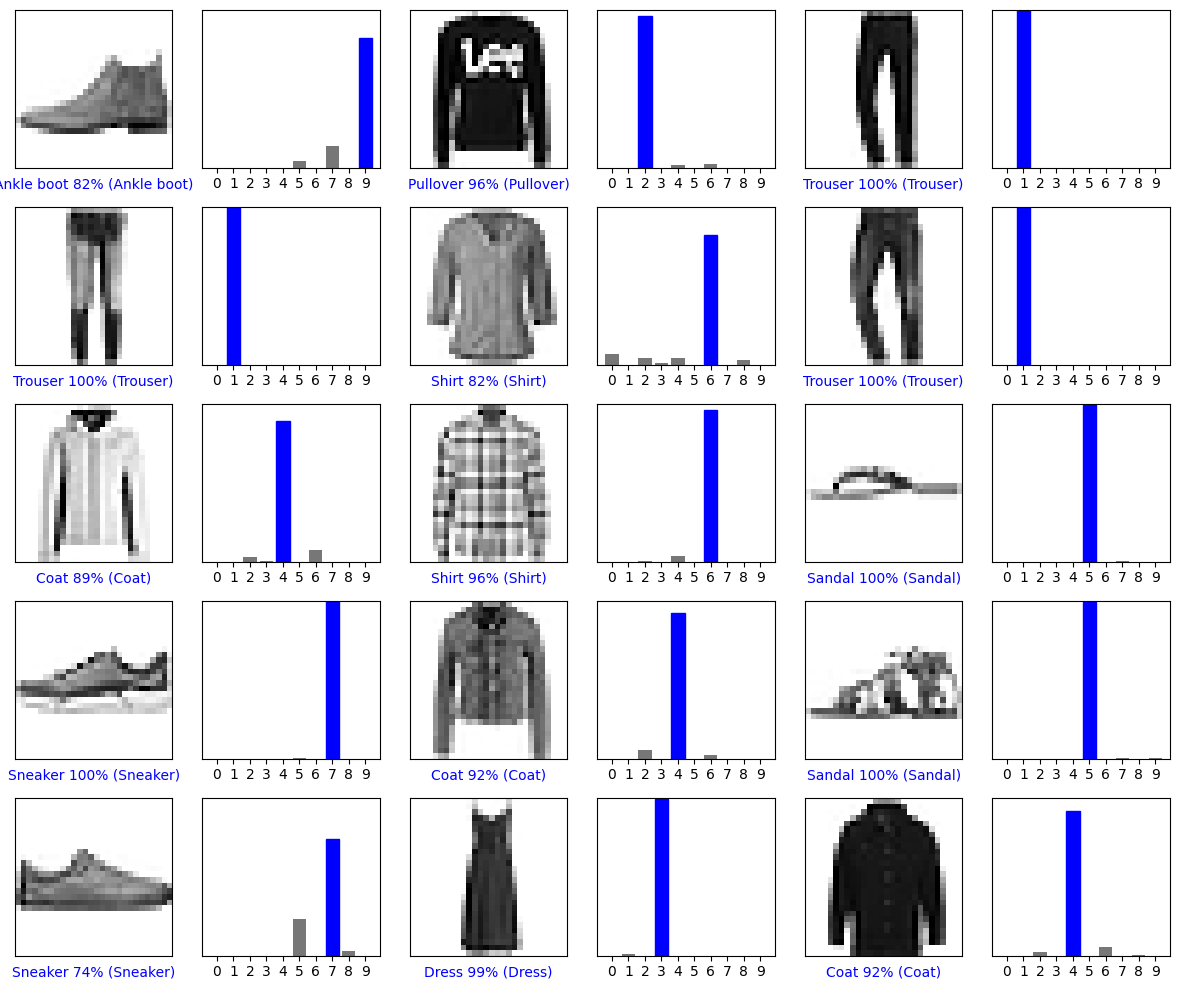

In [54]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
report(test_labels, predictions)

REPORT

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.84      0.64      0.73      1000
           3       0.86      0.87      0.86      1000
           4       0.71      0.85      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.62      0.70      0.66      1000
           7       0.92      0.96      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

CONFUSION MATRIX

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      743    0   16   40    5    3  185    0    8    0
1        2  960    0   28    4    0    2    0  

**Исправляем ситуацию с сандалями и пробуем повысить метрику**

In [56]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='hard_sigmoid'),
    keras.layers.Dense(10)
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.fit(train_images, train_labels, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 1s - loss: 0.3159 - accuracy: 0.8841 - 1s/epoch - 726us/step
Epoch 2/5
1875/1875 - 1s - loss: 0.3006 - accuracy: 0.8897 - 1s/epoch - 771us/step
Epoch 3/5
1875/1875 - 1s - loss: 0.2878 - accuracy: 0.8941 - 1s/epoch - 723us/step
Epoch 4/5
1875/1875 - 1s - loss: 0.2766 - accuracy: 0.8983 - 1s/epoch - 720us/step
Epoch 5/5
1875/1875 - 1s - loss: 0.2666 - accuracy: 0.9021 - 1s/epoch - 738us/step


In [64]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [65]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 549us/step


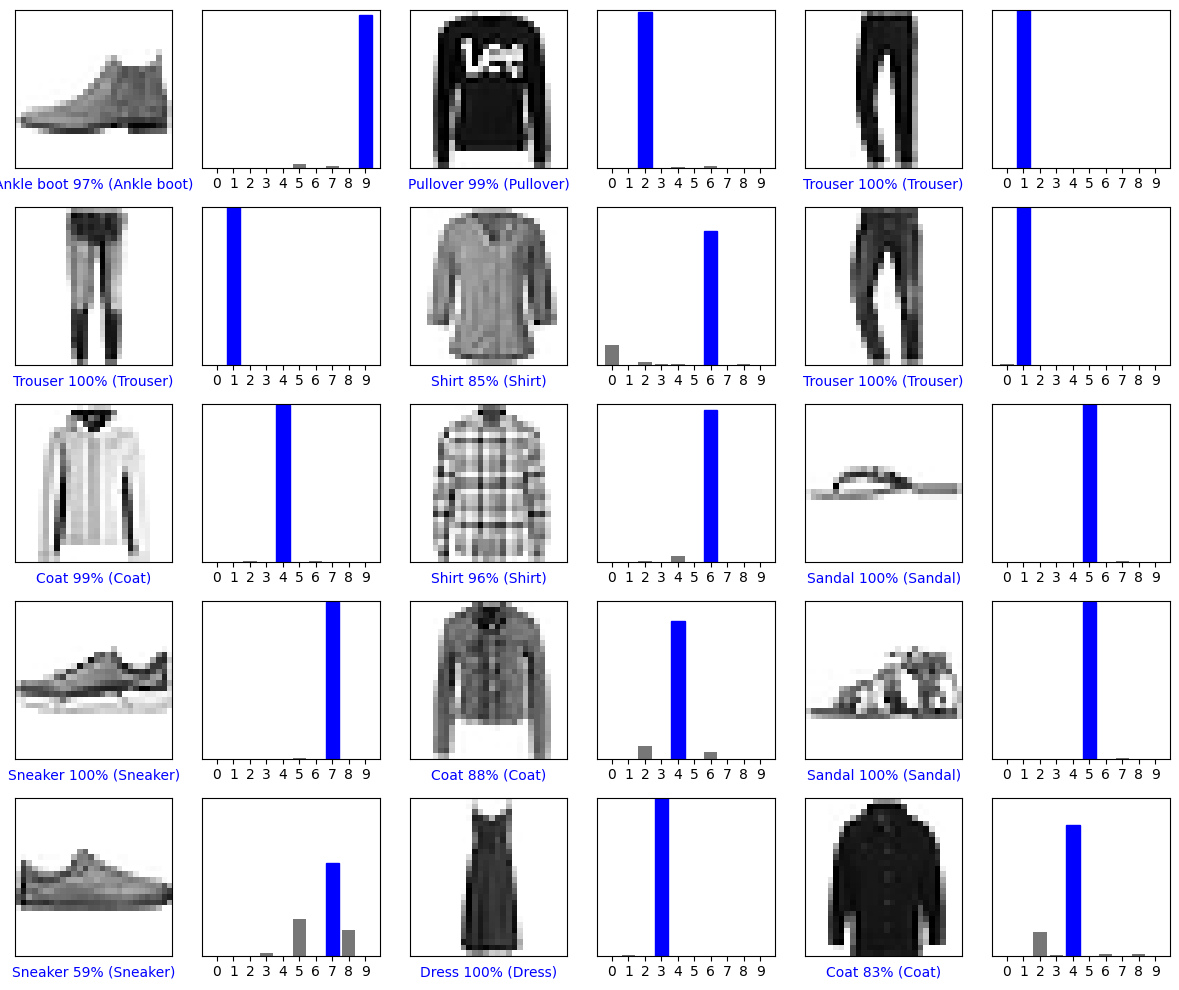

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [67]:
report(test_labels, predictions)

REPORT

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.86      0.90      0.88      1000
           4       0.76      0.85      0.80      1000
           5       0.96      0.94      0.95      1000
           6       0.74      0.65      0.69      1000
           7       0.95      0.93      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

CONFUSION MATRIX

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      801    3   15   43    4    1  121    0   12    0
1        1  966    3   23    5    0    1    0  

Смена функции активации на сигмоидную и увеличение количества эпох до 5 немного увеличивает результат